# Project - 1: Weather Data Plot 

The data for this project comes from a subset of The National Centers for Environmental Information (NCEI) Global Historical Climatology Network daily (GHCNd) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe. In particular, this project uses the data from Ann Arbor Michigan location and is stored in the file "Projects\WeatherData".

Each row in this datafile corresponds to a single observation from a weather station, and has the following variables:
* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this project, the requirements are as below:

1. Plot line graphs of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015. (Based on the graph, do you think extreme weather is getting more frequent in 2015?)
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Consider issues such as legends, labels, and chart junk.


## Step 1

Load the dataset and transform the data into Celcius (refer to documentation) then extract all of the rows which have minimum or maximum temperatures.

In [2]:
# import all the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
# Read data from the csv file
df = pd.read_csv("C:\\Users\\Manya\\Desktop\\Projects\\WeatherData.csv") 
df.head()
# df.describe()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [4]:
# Transform the Data_Value column according to the dataset explanation, Data_Value is in tenths of degrees C
df['Data_Value'] = df['Data_Value']*0.1
df.head()
# df.dtypes

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,2.2
1,USC00208972,2009-04-29,TMIN,5.6
2,USC00200032,2008-05-26,TMAX,27.8
3,USC00205563,2005-11-11,TMAX,13.9
4,USC00200230,2014-02-27,TMAX,-10.6


## Step 2
In order to visualize the data we would plot the min and max data for each day of the year between the years 2005 and 2014 across all weather stations. But we also need to find out when the min or max temperature in 2015 falls below the min or rises above the max for the previous decade.

In [5]:
# We add the month-day column in the DataFrame for the plot
# convert string Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
# extract the month-day and year column
df['month_day']= df['Date'].dt.strftime('%m-%d')
df['year']= df['Date'].dt.strftime('%Y')
df.head()

,ID,Date,Element,Data_Value,month_day,year
0,USW00094889,2014-11-12,TMAX,2.2,11-12,2014
1,USC00208972,2009-04-29,TMIN,5.6,04-29,2009
2,USC00200032,2008-05-26,TMAX,27.8,05-26,2008
3,USC00205563,2005-11-11,TMAX,13.9,11-11,2005
4,USC00200230,2014-02-27,TMAX,-10.6,02-27,2014


In [6]:
# drop the records for February 29 (Leap Year)
df = df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]

# create dataframes for the year 2015 and 2005-2014
df_2015 = df.where(df['Date'].dt.year == 2015).dropna()
df_2005_2014 = df.where(df['Date'].dt.year != 2015).dropna()

# create a DataFrame of maximum temperature by date
df_max_2015 = df_2015.groupby(by=['Element', 'month_day'])['Data_Value'].max().reset_index()
df_max_2005_2014 = df_2005_2014.groupby(by=['Element', 'month_day'])['Data_Value'].max().reset_index()
# print(df_max_2015)
# print(df_max_2005_2014)

# create a DataFrame of minimum temperatures by date
df_min_2015 = df_2015.groupby(by=['Element', 'month_day'])['Data_Value'].min().reset_index()
df_min_2005_2014 = df_2005_2014.groupby(by=['Element', 'month_day'])['Data_Value'].min().reset_index()
# print(df_min_2015)
# print(df_min_2005_2014) 

## Step 3
After grouping the daily max and min temperatures for each day of the years 2005 through 2015, separate out the data for 2015.
Then we can use the groupby function to find the max and min of the temperature data for each day of the year for the 2005-2014 data.

In [7]:
# calculate the minimum and maximum values for the years 2015
record_max_2015 = df_max_2015.where(df_max_2015['Element']=='TMAX').dropna()
record_min_2015 = df_min_2015.where(df_min_2015['Element']=='TMIN').dropna()
# print(record_max_2015)
# print(record_min_2015)

# calculate the minimum and maximum values for the day of the year for 2005 through 2014
record_max_2005_2014 = df_max_2005_2014.where(df_max_2005_2014['Element']=='TMAX').dropna()
record_min_2005_2014 = df_min_2005_2014.where(df_min_2005_2014['Element']=='TMIN').dropna()
# print(record_max_2005_2014)
# print(record_min_2005_2014)

## Step 4
Plot the line chart and overlay scatter chart of 2015 data for any points(highs and lows) for which the ten year record(2005-2014) record high or record low was broken in 2015.

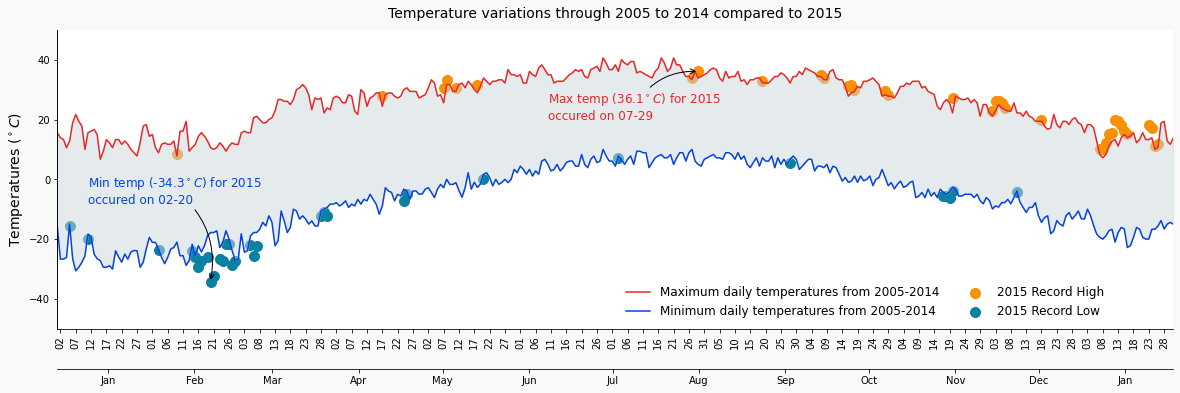

In [18]:
# plot the figure and axes
fig, ax = plt.subplots(figsize= (20,5.5), facecolor = '#F9F9F9')

# plot the maximum temperatures each day for the years through 2005 through 2014
ax.plot(record_max_2005_2014['month_day'], record_max_2005_2014['Data_Value'], color= '#e82727')
# plot the minimum temperatures each day for the years through 2005 through 2014
ax.plot(record_min_2005_2014['month_day'], record_min_2005_2014['Data_Value'], color= '#0343DF')

# plot scatter plot for temperatures in 2015
temp_max_2015 = record_max_2015[record_max_2015['Data_Value'] > record_max_2005_2014['Data_Value']]
temp_min_2015 = record_min_2015[record_min_2015['Data_Value'] < record_min_2005_2014['Data_Value']]
ax.scatter(temp_max_2015['month_day'], temp_max_2015['Data_Value'], color = '#fa9005', s=100)
ax.scatter(temp_min_2015['month_day'], temp_min_2015['Data_Value'], color = '#0b81a2', s=100)

# breakdown the x-axis to month and days xticks values, format the x tick labels
# set 1st x-axis (DAYS) with interval in 40 days to make xticks values visible
ax.xaxis.set_major_locator(mdates.DayLocator(interval= 5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y')) # plots month-year format in x-axis, did not use here
plt.xticks(rotation = 90)

# create a twin Axes sharing the yaxis
ax1 = ax.twiny()

# Set 2nd x-axis for MONTH
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval= 1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.xaxis.set_ticks_position('bottom')
ax1.xaxis.set_label_position('bottom')
ax1.spines['bottom'].set_position(('outward', 40))
ax1.set_xlim(ax.get_xlim()) 

# set limits for x and y axis of the plot
ax.set_xlim(df['month_day'].min(), df['month_day'].max())
ax.set_ylim(-50, 50)

# add labels and title
ax.set_ylabel('Temperatures ($^\circ C $)',
              {'fontsize': 14, 'color': '#000000'})
ax.set_title("Temperature variations through 2005 to 2014 compared to 2015",
              {'fontsize': 14, 'color': '#000000'}, y=1.02)
ax.legend(['Maximum daily temperatures from 2005-2014','Minimum daily temperatures from 2005-2014', 
           '2015 Record High', '2015 Record Low'], loc= 'best', bbox_to_anchor = (0.5,0, 0.5, 0.5),
              ncol=2, fontsize= 12, labelcolor= '#000000', edgecolor = 'white')  
ax.fill_between(record_max_2005_2014['month_day'], record_max_2005_2014['Data_Value'], record_min_2005_2014['Data_Value'],
                 color='#CCD6DB',alpha= 0.5)

# to annotate the max and minimum temperatures for 2015 we can use the following code, first find the max and min 
# temperature values and when it occured
max_date_2015 = df_max_2015[df_max_2015['Data_Value']== df_max_2015['Data_Value'].max()]['month_day'].values[0]
max_temp_2015 = df_max_2015['Data_Value'].max()
h_val = str(max_temp_2015)
min_date_2015 = df_min_2015[df_min_2015['Data_Value']== df_min_2015['Data_Value'].min()]['month_day'].values[0]
min_temp_2015 = df_min_2015['Data_Value'].min()
l_val = str(round(min_temp_2015,2))

# annotate highest temperature value in 2015
ax.annotate('Max temp (' + h_val + '$^\circ C $) for 2015 \noccured on '+max_date_2015, (max_date_2015, max_temp_2015), 
            xytext=(160, 20), size = 12, color='#e82727',
            arrowprops = dict(arrowstyle="->", connectionstyle="arc3, rad = -0.3"))

# annotate lowest temperature value in 2015
ax.annotate('Min temp (' + l_val + '$^\circ C $) for 2015 \noccured on '+min_date_2015, (min_date_2015, min_temp_2015), 
            xytext=(10, -8), size = 12, color='#0343DF',
            arrowprops = dict(arrowstyle="->", connectionstyle="arc3, rad = -0.3"))

# we can hide some of the spines (must be done with Matplotlib)
for ax in fig.canvas.figure.get_axes():
    # Disable spines.
    ax.spines[['right', 'top']].set_color('none')